<a href="https://colab.research.google.com/github/Aryan-Herur/Diabetic_retinopathy_CNN/blob/main/DR_Envision__2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from google.colab import drive, files
import os


In [ ]:
drive.mount('/content/drive')
dir_path = "/content/drive/MyDrive/DR/colored_images/"

Mounted at /content/drive


In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/DR/archive.zip"
extract_path = "/content/drive/MyDrive/DR/"


with zipfile.ZipFile(zip_path, 'r') as zip_ref:

    zip_ref.extractall(extract_path)

In [ ]:
for root,dir,files in os.walk(dir_path):
 for file in files:

   print (os.path.join(root,file))

/content/drive/MyDrive/DR/colored_images/Mild/15cc2aef772a.png
/content/drive/MyDrive/DR/colored_images/Mild/172df1330a60.png
/content/drive/MyDrive/DR/colored_images/Mild/17eff993386f.png
/content/drive/MyDrive/DR/colored_images/Mild/18b06f56ab27.png
/content/drive/MyDrive/DR/colored_images/Mild/194814669fee.png
/content/drive/MyDrive/DR/colored_images/Mild/1a03a7970337.png
/content/drive/MyDrive/DR/colored_images/Mild/19722bff5a09.png
/content/drive/MyDrive/DR/colored_images/Mild/19e350c7c83c.png
/content/drive/MyDrive/DR/colored_images/Mild/1b329a127307.png
/content/drive/MyDrive/DR/colored_images/Mild/1bb0ddfe753a.png
/content/drive/MyDrive/DR/colored_images/Mild/1c0cf251b426.png
/content/drive/MyDrive/DR/colored_images/Mild/1d11794057ff.png
/content/drive/MyDrive/DR/colored_images/Mild/1c3a6b4449e9.png
/content/drive/MyDrive/DR/colored_images/Mild/1d674e2e32e0.png
/content/drive/MyDrive/DR/colored_images/Mild/1df3e03a8f5f.png
/content/drive/MyDrive/DR/colored_images/Mild/1e8a1fdee

In [ ]:
import matplotlib.pyplot as plt

from PIL import Image,UnidentifiedImageError


In [ ]:
def load_img(impath):
  imgs=[]
  labels=[]
  l1=os.listdir(impath)
  for i in l1:
         l2=os.listdir(impath+'/'+i)
         for j in l2:
           try:
             filepath=impath+'/'+i+'/'+j
             img=Image.open(filepath)
             imgs.append(np.array(img))
             labels.append(i)
           except UnidentifiedImageError as e:
                print(f'Error reading image at file path {filepath}: {e}')
                continue
  return np.array(imgs),labels


In [ ]:
x,y=load_img(dir_path)
print(x.shape)
print(len(y))

Error reading image at file path /content/drive/MyDrive/DR/colored_images//Mild/13ab8db8c700.png: cannot identify image file '/content/drive/MyDrive/DR/colored_images//Mild/13ab8db8c700.png'
Error reading image at file path /content/drive/MyDrive/DR/colored_images//Moderate/48c49f662f7d.png: cannot identify image file '/content/drive/MyDrive/DR/colored_images//Moderate/48c49f662f7d.png'
Error reading image at file path /content/drive/MyDrive/DR/colored_images//No_DR/6d9effbcde78.png: cannot identify image file '/content/drive/MyDrive/DR/colored_images//No_DR/6d9effbcde78.png'
(3659, 224, 224, 3)
3659


In [ ]:
unique_categories,category_counts=np.unique(y,return_counts=True)
for i in range(len(unique_categories)):
  print(f"Category '{unique_categories[i]}'occurs {category_counts[i]} times")



Category 'Mild'occurs 369 times
Category 'Moderate'occurs 998 times
Category 'No_DR'occurs 1804 times
Category 'Proliferate_DR'occurs 295 times
Category 'Severe'occurs 193 times


Text(0.5, 1.0, 'Category counts')

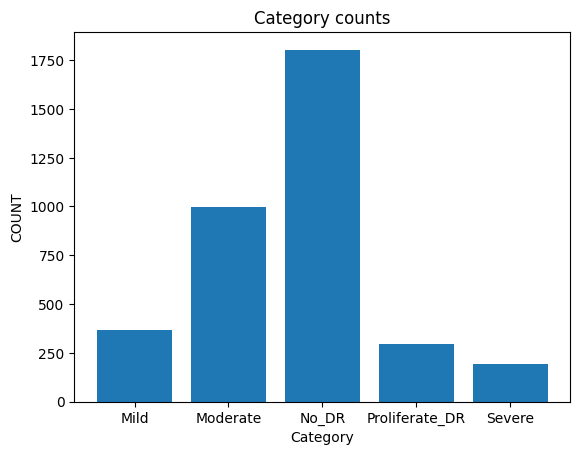

In [ ]:
plt.bar(unique_categories,category_counts)
plt.xlabel("Category")
plt.ylabel("COUNT")

plt.title("Category counts")



In [ ]:
target=pd.Series(y,dtype='category')
print(target)

0         Mild
1         Mild
2         Mild
3         Mild
4         Mild
         ...  
3654    Severe
3655    Severe
3656    Severe
3657    Severe
3658    Severe
Length: 3659, dtype: category
Categories (5, object): ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']


In [ ]:
t=target.cat.codes

print(t)

0       0
1       0
2       0
3       0
4       0
       ..
3654    4
3655    4
3656    4
3657    4
3658    4
Length: 3659, dtype: int8


In [ ]:
unique_category=target.unique()
code_map=dict(zip(unique_categories,t.unique()))
print(code_map)

{'Mild': 0, 'Moderate': 1, 'No_DR': 2, 'Proliferate_DR': 3, 'Severe': 4}


In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,t,test_size=0.2,shuffle=True)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


(2927, 224, 224, 3)
(2927,)
(732, 224, 224, 3)
(732,)


In [ ]:
import numpy as np
#import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model

from tensorflow.keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow

from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

 Transfer learning

---



In [ ]:
from keras.applications import VGG16

In [ ]:
vgg=VGG16(input_shape=(224,224,3),weights='imagenet',include_top=False)

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
vgg.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
for i in vgg.layers:
    i.trainable=False
x =Flatten()(vgg.output)

In [ ]:
pred=Dense(5,activation="softmax",)(x)

In [ ]:
model=Model(inputs=vgg.input,outputs=pred)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen=ImageDataGenerator(
               rescale=1.0/255,
               width_shift_range=0.2,
               height_shift_range=0.2,
               rotation_range=40,
               shear_range=0.2,
               zoom_range=0.2,
               horizontal_flip=True,
              fill_mode='nearest',
)
train_gen=data_gen.flow(train_x, train_y,batch_size=32)
validation_datagen=ImageDataGenerator(
     rescale=1.0/255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)
validation_gen=validation_datagen.flow(test_x,test_y,batch_size=32)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
Dropout(0.5)
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
Dropout(0.5)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
Dropout(0.8)
model.add(Dense(5, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_gen ,epochs=10 ,validation_data=validation_gen)

Epoch 1/10
92/92 [==============================] - 56s 472ms/step - loss: 1.1452 - accuracy: 0.5446 - val_loss: 0.9835 - val_accuracy: 0.6421
Epoch 2/10
92/92 [==============================] - 41s 444ms/step - loss: 0.9348 - accuracy: 0.6727 - val_loss: 0.8999 - val_accuracy: 0.6817
Epoch 3/10
92/92 [==============================] - 43s 463ms/step - loss: 0.8593 - accuracy: 0.7045 - val_loss: 0.8411 - val_accuracy: 0.6899
Epoch 4/10
92/92 [==============================] - 41s 446ms/step - loss: 0.8531 - accuracy: 0.7086 - val_loss: 0.8223 - val_accuracy: 0.7036
Epoch 5/10
92/92 [==============================] - 43s 469ms/step - loss: 0.8519 - accuracy: 0.7096 - val_loss: 0.8872 - val_accuracy: 0.6858
Epoch 6/10
92/92 [==============================] - 42s 459ms/step - loss: 0.8332 - accuracy: 0.7157 - val_loss: 0.8416 - val_accuracy: 0.7090
Epoch 7/10
92/92 [==============================] - 41s 442ms/step - loss: 0.8113 - accuracy: 0.7209 - val_loss: 0.8199 - val_accuracy: 0.7049

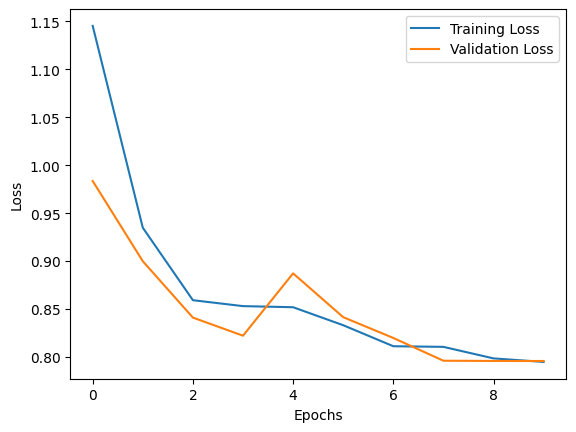

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

23/23 [==============================] - 7s 308ms/step


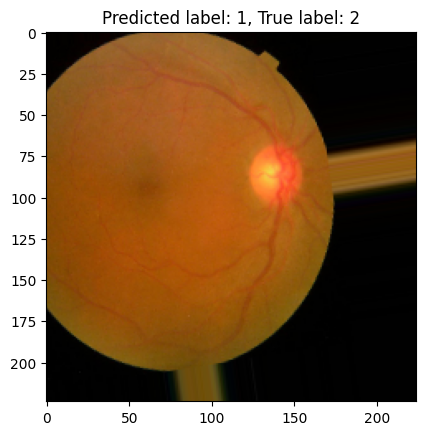

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# get the predicted class probabilities for the validation set
y_pred_prob = model.predict(validation_gen)

# get the predicted class for each sample in the validation set
y_pred = np.argmax(y_pred_prob, axis=1)

# get a batch of validation images and their true labels
x_val, y_val = next(validation_gen)

# select a random image from the batch
index = np.random.randint(len(x_val))

# get the predicted label for the selected image
label_pred = y_pred[index]

# get the true label for the selected image
label_true = y_val[index]

# get the image array for the selected image
img = x_val[index]

# display the image with the predicted and true labels
plt.imshow(img)
plt.title(f"Predicted label: {label_pred}, True label: {label_true}")
plt.show()